Creating a god simulation and this is a Random Project , mix of philosophy and coding 

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

VARNAS = ["Brahmana", "Kshatriya", "Vaishya", "Shudra"]

# (The Human and World class definitions are here, unchanged)
class Human:
    def __init__(self, soul_id, generation=0):
        self.soul_id = soul_id; self.generation = generation; self.is_alive = True
        self.age = 0; self.lifespan = random.randint(50, 90); self.varna = None
        self.karma_score = 0
    def __repr__(self):
        display_varna = self.varna if self.varna is not None else "No Varna"
        return (f"[Soul:{self.soul_id:03d} | Gen:{self.generation:02d} | Varna:{display_varna:<10} | "
                f"Karma:{self.karma_score:4d} | Age:{self.age:02d}/{self.lifespan:02d}]")

class World:
    def __init__(self, population_cap=10000):
        self.year = 0; self.population = []; self.soul_counter = 0
        self.population_cap = population_cap; self.history = []
        self.soul_log = []
    def get_next_soul_id(self):
        self.soul_counter += 1; return self.soul_counter
    def create_first_generation(self, num_humans, rule='random'):
        print(f"\n--- GENESIS (Divine Law: {rule.upper()}) ---")
        if rule == 'random': print("\n!!! PHILOSOPHICAL ALERT: You chose the 'Unjust Lottery'. The system's claim to fairness is BROKEN at its origin.\n")
        elif rule == 'equal': print("\n!!! PHILOSOPHICAL ALERT: You chose 'Arbitrary Equality'. The system is still founded on a decree, not merit.\n")
        elif rule == 'emergent': print("\n!!! PHILOSOPHICAL ALERT: You chose the 'Blank Slate'. The most logical start, but the biased rules may still create inequality.\n")
        for _ in range(num_humans):
            new_human = Human(soul_id=self.get_next_soul_id(), generation=0)
            if rule == 'random': new_human.varna = random.choice(VARNAS)
            elif rule == 'equal': new_human.varna = 'Vaishya'
            elif rule == 'emergent': new_human.varna = None
            if len(self.population) < self.population_cap:
                self.population.append(new_human)
                self.soul_log.append({'soul_id': new_human.soul_id, 'generation': new_human.generation, 'birth_year': self.year, 'birth_varna': new_human.varna, 'karma_from_past_life': 0})
            else: break
        print(f"The first {len(self.population)} humans have been created.")
    def reincarnate(self, dead_human):
        if len(self.population) >= self.population_cap: return
        new_human = Human(soul_id=dead_human.soul_id, generation=dead_human.generation + 1)
        karma = dead_human.karma_score
        if karma > 75: new_human.varna = "Brahmana"
        elif karma > 25: new_human.varna = "Kshatriya"
        elif karma >= -25: new_human.varna = "Vaishya"
        else: new_human.varna = "Shudra"
        self.population.append(new_human)
        self.soul_log.append({'soul_id': new_human.soul_id, 'generation': new_human.generation, 'birth_year': self.year, 'birth_varna': new_human.varna, 'karma_from_past_life': karma})
    def live_one_year(self):
        self.year += 1
        for human in self.population[:]:
            if human.is_alive:
                human.age += 1; karma_change = 0
                if human.varna == "Brahmana": karma_change = random.randint(-1, 5)
                elif human.varna == "Kshatriya": karma_change = random.randint(-2, 4)
                elif human.varna == "Vaishya": karma_change = random.randint(-3, 3)
                else: karma_change = random.randint(-4, 2)
                human.karma_score += karma_change
                if human.age >= human.lifespan:
                    human.is_alive = False; self.population.remove(human); self.reincarnate(human)
        self.log_history()
    def log_history(self):
        if not self.population: return
        year_data = {'year': self.year, 'population': len(self.population)}
        for varna in VARNAS:
            count = len([p for p in self.population if p.varna == varna])
            avg_karma = sum(p.karma_score for p in self.population if p.varna == varna) / count if count > 0 else 0
            year_data[f'{varna}_count'] = count; year_data[f'{varna}_avg_karma'] = avg_karma
        self.history.append(year_data)
    def run_simulation(self, num_years):
        print(f"\n--- Running Simulation for {num_years} years ---")
        for i in range(num_years): self.live_one_year()
        print("\n--- Simulation Complete ---")

print("Blueprints are ready.")

Blueprints are ready.


      Welcome, Creator, to the God Simulation

Choose your Divine Law for the first humans:
  [1] The Unjust Lottery (Assign Varna randomly)
  [2] Arbitrary Equality (Assign all as 'Vaishya')
  [3] The Blank Slate (Let Varna emerge after the first life)

--- GENESIS (Divine Law: RANDOM) ---

!!! PHILOSOPHICAL ALERT: You chose the 'Unjust Lottery'. The system's claim to fairness is BROKEN at its origin.

The first 200 humans have been created.

--- Running Simulation for 1000 years ---

--- Simulation Complete ---

      Displaying Society-Level Hypothesis Results


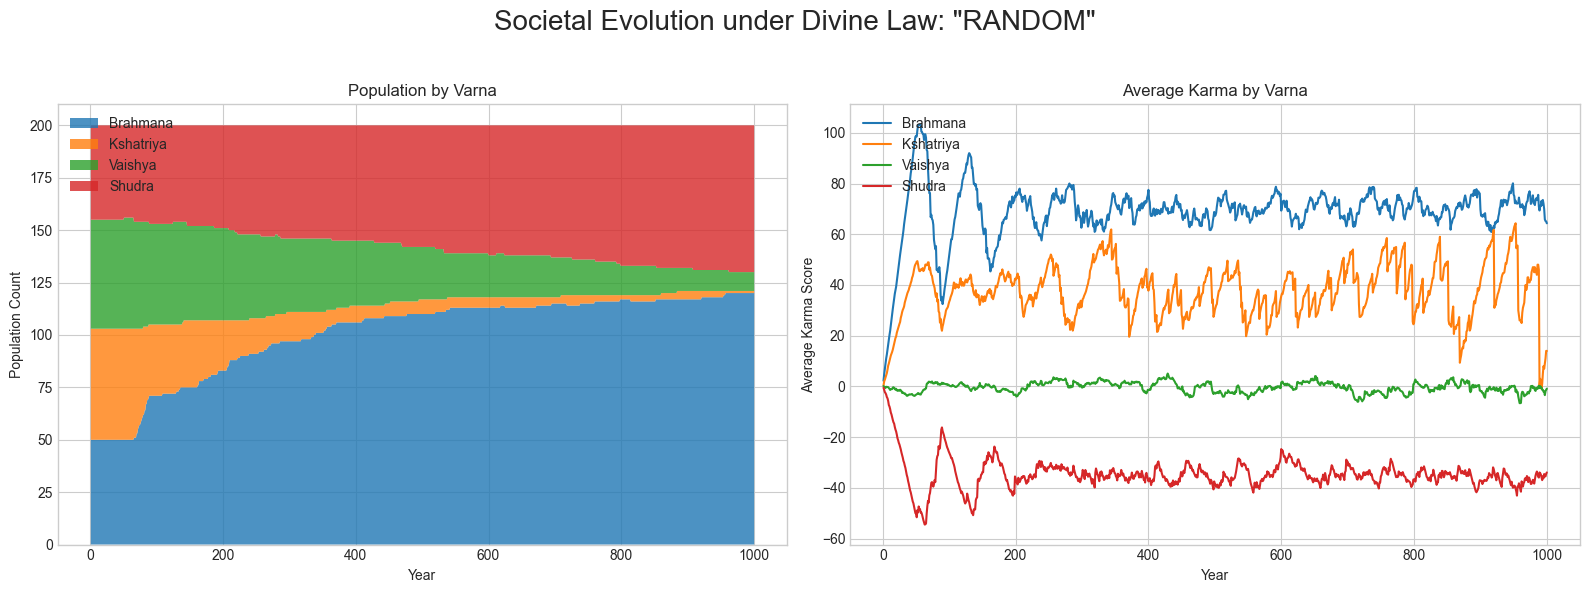


Universe created and society analyzed.


In [2]:


def plot_society_results(history_df, title):
    """Plots the two main society-level graphs."""
    print("\n" + "="*50)
    print("      Displaying Society-Level Hypothesis Results")
    print("="*50)

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Societal Evolution under Divine Law: "{title.upper()}"', fontsize=20)
    
    # Graph 1: Population Distribution
    ax1 = axes[0]
    ax1.stackplot(history_df['year'], history_df['Brahmana_count'], history_df['Kshatriya_count'], history_df['Vaishya_count'], history_df['Shudra_count'], labels=VARNAS, alpha=0.8)
    ax1.set_title('Population by Varna'); ax1.set_xlabel('Year'); ax1.set_ylabel('Population Count'); ax1.legend(loc='upper left')

    # Graph 2: The "Injustice" Graph
    ax2 = axes[1]
    for varna in VARNAS: ax2.plot(history_df['year'], history_df[f'{varna}_avg_karma'], label=varna)
    ax2.set_title('Average Karma by Varna'); ax2.set_xlabel('Year'); ax2.set_ylabel('Average Karma Score'); ax2.legend(loc='upper left')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()

def run_new_universe():
    print("="*50); print("      Welcome, Creator, to the God Simulation"); print("="*50)
    choice = ''
    while choice not in ['1', '2', '3']:
        print("\nChoose your Divine Law for the first humans:")
        print("  [1] The Unjust Lottery (Assign Varna randomly)")
        print("  [2] Arbitrary Equality (Assign all as 'Vaishya')")
        print("  [3] The Blank Slate (Let Varna emerge after the first life)")
        choice = input("Enter the number of your choice [1, 2, or 3]: ")
    rule_map = {'1': 'random', '2': 'equal', '3': 'emergent'}
    chosen_rule = rule_map[choice]
    world = World(population_cap=1000)
    world.create_first_generation(num_humans=200, rule=chosen_rule)
    world.run_simulation(num_years=1000)
    return world, chosen_rule

# --- Run the simulation and display society graphs ---
my_universe, chosen_rule = run_new_universe()
history_df = pd.DataFrame(my_universe.history)
soul_df = pd.DataFrame(my_universe.soul_log)

plot_society_results(history_df, title=chosen_rule)

print("\nUniverse created and society analyzed.")


      Entering the Soul Tracker
Soul IDs available for tracking: 1 to 200


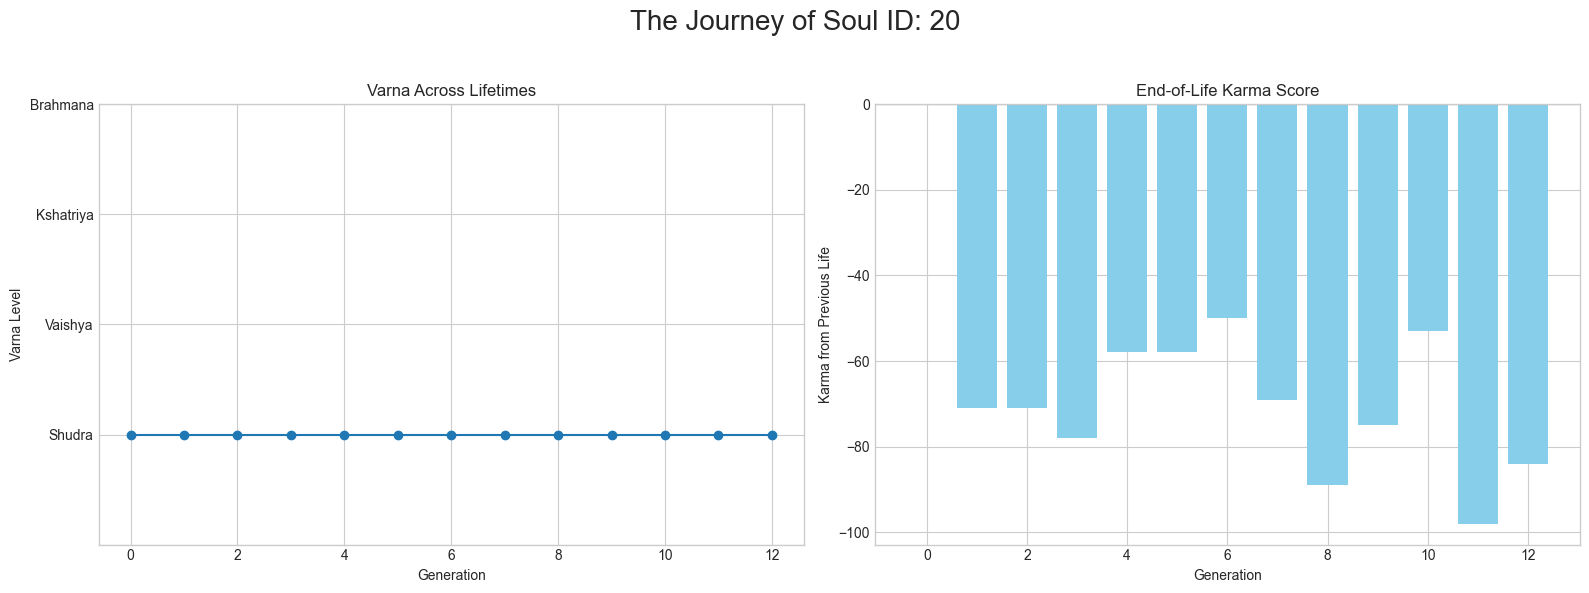

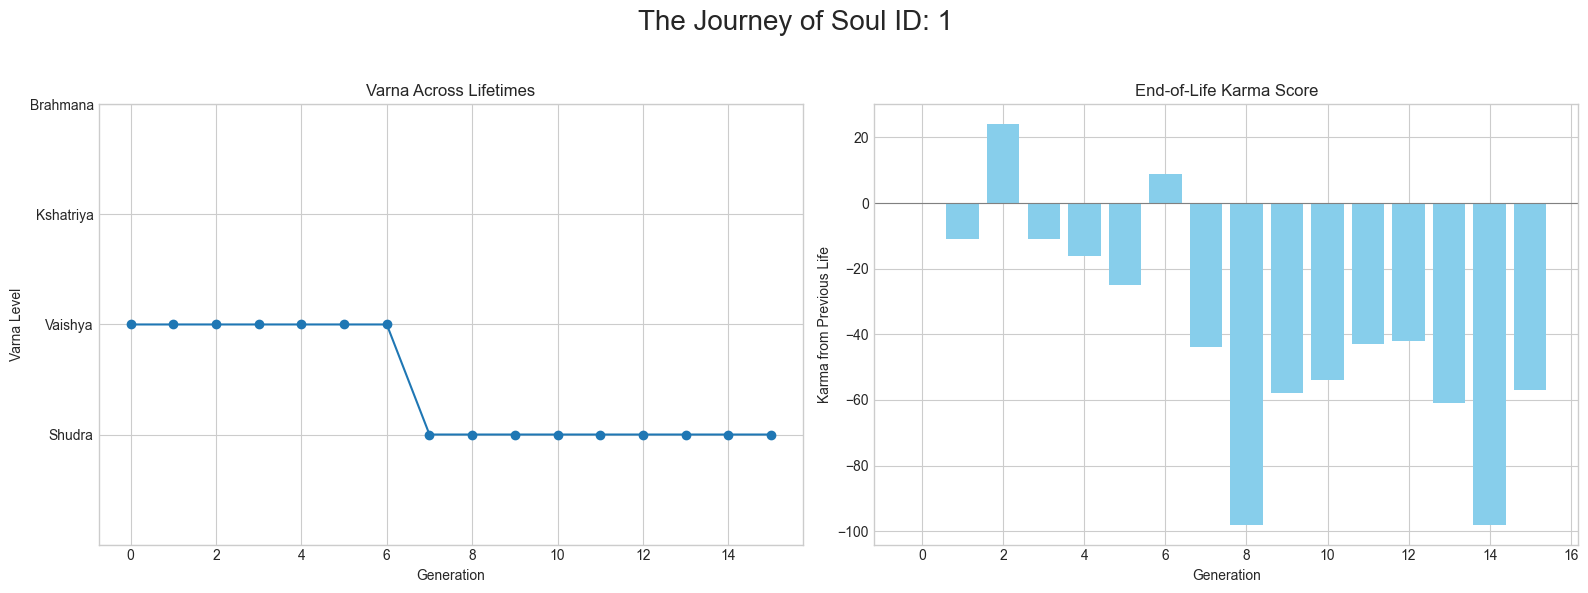

In [ ]:
#The Historian (Run after the simulation to analyze souls)

varna_map = {'Shudra': 1, 'Vaishya': 2, 'Kshatriya': 3, 'Brahmana': 4, None: 0}

print("\n" + "="*50); print("      Entering the Soul Tracker"); print("="*50)
print(f"Soul IDs available for tracking: 1 to {soul_df['soul_id'].max()}")

while True:
    try:
        target_id_str = input("\nEnter a Soul ID to track (or type 'quit' to exit): ")
        if target_id_str.lower() == 'quit': break
        
        target_id = int(target_id_str)
        journey = soul_df[soul_df['soul_id'] == target_id].sort_values(by='generation')

        if journey.empty: print(f"Sorry, Soul ID {target_id} not found."); continue

        journey['varna_numeric'] = journey['birth_varna'].map(varna_map)
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f'The Journey of Soul ID: {target_id}', fontsize=20)
        
        ax1 = axes[0]
        ax1.plot(journey['generation'], journey['varna_numeric'], marker='o', linestyle='-')
        ax1.set_title('Varna Across Lifetimes'); ax1.set_xlabel('Generation'); ax1.set_ylabel('Varna Level')
        ax1.set_yticks(list(varna_map.values())); ax1.set_yticklabels(list(varna_map.keys())); ax1.grid(True)

        ax2 = axes[1]
        ax2.bar(journey['generation'], journey['karma_from_past_life'], color='skyblue')
        ax2.axhline(0, color='grey', linewidth=0.8)
        ax2.set_title('End-of-Life Karma Score'); ax2.set_xlabel('Generation'); ax2.set_ylabel('Karma from Previous Life')
        plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()
    except (ValueError, KeyError):
        print("Invalid input. Please enter a valid number or 'quit'.")